# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

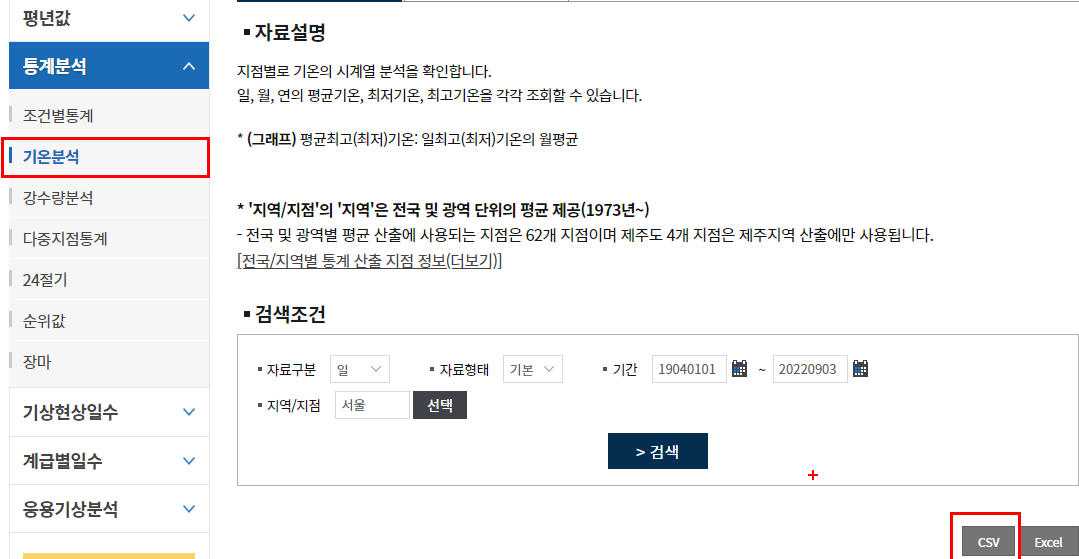

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
# !pip install matplotlib

In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로드

In [3]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df1 = pd.read_csv('./data/ta_20230415151831.csv')
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
41764,2023-04-10,108,13.2,6.2,19.1
41765,2023-04-11,108,13.1,9.2,17.4
41766,2023-04-12,108,10.1,4.8,15.3
41767,2023-04-13,108,11.9,5.1,17.2


In [4]:
df2 = pd.read_csv("./data/ta_20230510073846.csv", encoding='utf-8', header=7)
df2

,\t1907-10-01,108,13.5,7.9,20.7
0,\t1907-10-02,108,16.2,7.9,22.0
1,\t1907-10-03,108,16.2,13.1,21.3
2,\t1907-10-04,108,16.5,11.2,22.0
3,\t1907-10-05,108,17.6,10.9,25.4
4,\t1907-10-06,108,13.0,11.2,21.3
...,...,...,...,...,...
41788,\t2023-05-05,108,18.4,15.5,21.6
41789,\t2023-05-06,108,12.6,11.7,15.5
41790,\t2023-05-07,108,14.4,11.1,18.6
41791,\t2023-05-08,108,15.3,7.9,22.0


## 데이터 살펴보기

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41769 entries, 0 to 41768
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41769 non-null  object 
 1   지점       41769 non-null  int64  
 2   평균기온(℃)  41012 non-null  float64
 3   최저기온(℃)  41009 non-null  float64
 4   최고기온(℃)  41009 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df1.isnull().sum()

날짜           0
지점           0
평균기온(℃)    757
최저기온(℃)    760
최고기온(℃)    760
dtype: int64

## 결측 데이터 전처리

### 결측데이터수 파악하기

In [7]:
df1.isnull().sum().sum()

np.int64(2277)

In [8]:
# 열(column)별 결측치 수 파악하기
df1.isnull().sum()

날짜           0
지점           0
평균기온(℃)    757
최저기온(℃)    760
최고기온(℃)    760
dtype: int64

In [9]:
# 행(row)별 결측치 수 파악하기
df1.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
41764    0
41765    0
41766    0
41767    0
41768    3
Length: 41769, dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [10]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음

df1[df1[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']].isnull().any(axis=1)]['날짜']

15676    1950-09-01
15677    1950-09-02
15678    1950-09-03
15679    1950-09-04
15680    1950-09-05
            ...    
21260    1967-02-19
23691    1973-10-16
39758    2017-10-12
41519    2022-08-08
41768    2023-04-14
Name: 날짜, Length: 761, dtype: object

### 결측치 데이터 처리


In [11]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움

df1['평균기온(℃)'] = df1['평균기온(℃)'].fillna(0)
df1['최저기온(℃)'] = df1['최저기온(℃)'].fillna(999)
df1['최고기온(℃)'] = df1['최고기온(℃)'].fillna(-999)


In [12]:
# 결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인

df1[df1['날짜'].str.contains('1950')]
# df1[df1['날짜'].str.contains('1950', case=False)]  # 대소문자 구분 없이 검색

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15433,1950-01-01,108,2.8,0.7,4.5
15434,1950-01-02,108,-0.1,-3.8,2.4
15435,1950-01-03,108,-4.6,-7.3,-0.7
15436,1950-01-04,108,-7.7,-11.2,-4.2
15437,1950-01-05,108,-7.0,-11.6,-3.1
...,...,...,...,...,...
15727,1950-10-27,108,0.0,999.0,-999.0
15728,1950-10-28,108,0.0,999.0,-999.0
15729,1950-10-29,108,0.0,999.0,-999.0
15730,1950-10-30,108,0.0,999.0,-999.0


## 컬럼명 바꾸기

In [13]:
# 컬럼 개수 정확히 맞춰야 함.
df1.columns=['날짜', '지점', '평균기온', '최저기온', '최고기온']

In [14]:
# 컬럼이 너무 많을 경우, 특정 컬럼을 지정하여 변경
df1 = df1.rename(columns={'평균기온(℃)': '평균기온'})

In [15]:
df1.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 서울에서 가장 더웠던 날은?

In [16]:
#최고 더운 날은?
df1.sort_values(by='최고기온', ascending=False).head(1)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [17]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
hot = df1.sort_values(by='최고기온', ascending=False)
date = hot.head(1)[['날짜','최고기온']].values[0][0] # print(hot.iloc[0]['날짜'])
temp = hot.head(1)[['날짜','최고기온']].values[0][1] # print(hot.iloc[0]['최고기온'])

print(f'서울에서 가장 더웠던 날은? {date}: {temp}도')

서울에서 가장 더웠던 날은? 2018-08-01: 39.6도


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [18]:
#라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20230415151831.csv')

# 결측치 처리
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)


## 내 생일 데이터만 추출

In [19]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출
df[df['날짜'].str.contains('07-29')]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
302,1908-07-29,108,26.6,24.7,29.8
667,1909-07-29,108,27.0,23.0,31.6
1032,1910-07-29,108,28.0,25.0,32.4
1397,1911-07-29,108,23.3,20.3,28.5
1763,1912-07-29,108,26.2,22.3,32.2
...,...,...,...,...,...
40048,2018-07-29,108,31.3,26.4,36.7
40413,2019-07-29,108,27.5,25.6,30.0
40779,2020-07-29,108,23.7,22.6,24.9
41144,2021-07-29,108,29.6,27.0,33.3


## 필요한 컬럼만 추출

In [20]:
# 필요한 컬럼만 추출
df_fix = df[df['날짜'].str.contains('07-29')].sort_values(by='날짜')
df_fix[['날짜', '평균기온(℃)']]

,날짜,평균기온(℃)
302,1908-07-29,26.6
667,1909-07-29,27.0
1032,1910-07-29,28.0
1397,1911-07-29,23.3
1763,1912-07-29,26.2
...,...,...
40048,2018-07-29,31.3
40413,2019-07-29,27.5
40779,2020-07-29,23.7
41144,2021-07-29,29.6


/tmp/ipykernel_744/3825400148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


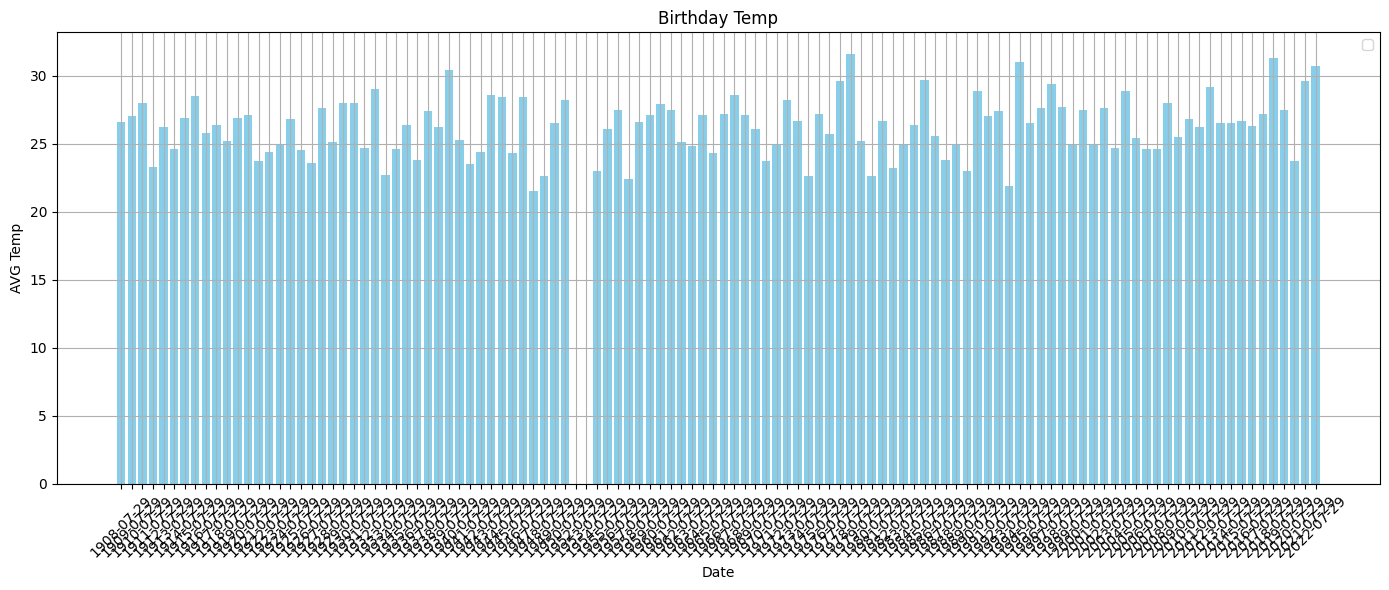

In [21]:
# 내 생일 데이터 그래프 그리기

# 그래프 크기 지정 (날짜가 많으면 넓게 설정)
plt.figure(figsize=(14, 6))

# 그래프 타이틀
plt.title('Birthday Temp')

# 막대그래프 그리기
plt.bar(df_fix['날짜'], df_fix['평균기온(℃)'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('AVG Temp')

# x축 날짜 눈금이 겹치지 않게 회전
plt.xticks(rotation=45)

plt.grid(True)

# 레이아웃 자동 조정
plt.tight_layout()
plt.legend()
plt.show()

## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [22]:
#라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 로딩
df = pd.read_csv('./data/ta_20230415151831.csv')
df.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3


In [23]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    757
최저기온(℃)    760
최고기온(℃)    760
dtype: int64

In [24]:
# 결측 데이터 삭제
df_dropna = df.dropna()
df_dropna.info()
df_dropna.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 41008 entries, 0 to 41767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41008 non-null  object 
 1   지점       41008 non-null  int64  
 2   평균기온(℃)  41008 non-null  float64
 3   최저기온(℃)  41008 non-null  float64
 4   최고기온(℃)  41008 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [25]:
# 내 생일이면서, 1980년 이후의 데이터만 추출
df_birth = df_dropna[df_dropna['날짜'].str.contains('07-29')]
df_birth.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
302,1908-07-29,108,26.6,24.7,29.8
667,1909-07-29,108,27.0,23.0,31.6
1032,1910-07-29,108,28.0,25.0,32.4


In [26]:
# 필요한 컬럼만 추출
year = df_birth[df_birth['날짜'].str[:4] >= '1997'] # 날짜 컬럼 문자열 중 앞 4개만

In [27]:
year

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
32378,1997-07-29,108,29.4,26.7,33.6
32743,1998-07-29,108,27.7,22.8,31.9
33108,1999-07-29,108,25.0,22.5,27.1
33474,2000-07-29,108,27.5,25.2,29.7
33839,2001-07-29,108,24.9,22.3,28.1
34204,2002-07-29,108,27.6,25.6,30.0
34569,2003-07-29,108,24.7,21.2,29.3
34935,2004-07-29,108,28.9,24.1,33.2
35300,2005-07-29,108,25.4,22.2,28.5
35665,2006-07-29,108,24.6,22.1,27.2


/tmp/ipykernel_744/1853269341.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


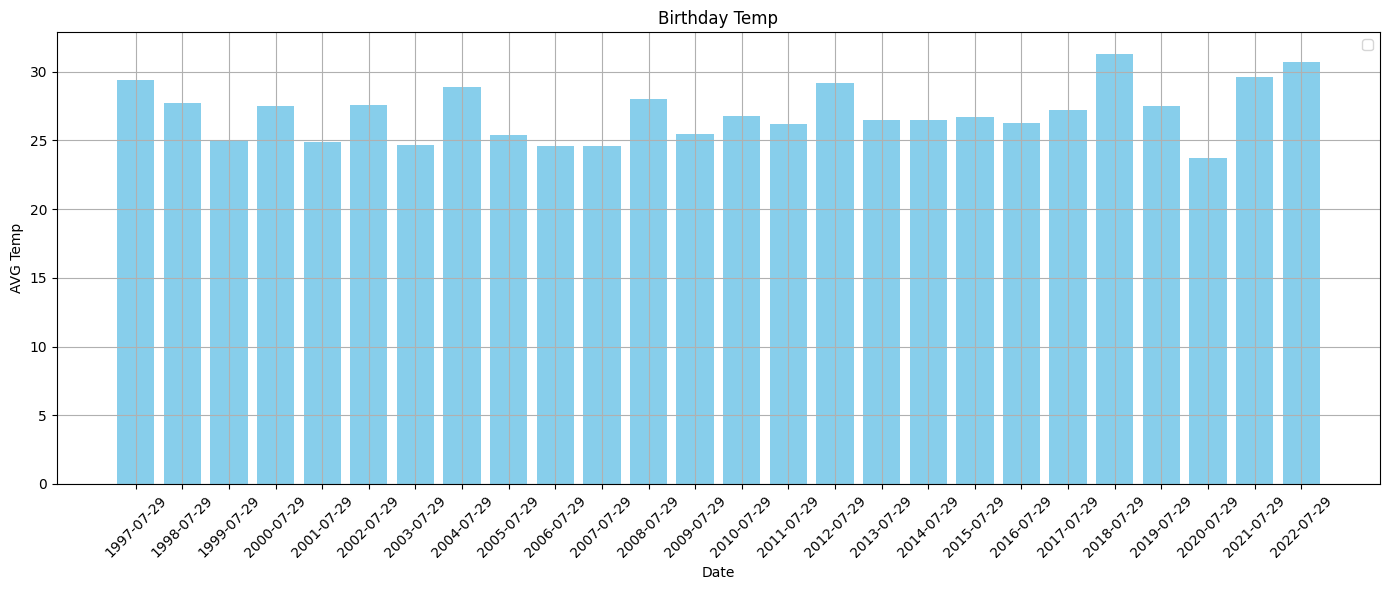

In [28]:
# 내 생일 데이터 그래프 그리기 (평균기온)

# 그래프 크기 지정 (날짜가 많으면 넓게 설정)
plt.figure(figsize=(14, 6))

# 그래프 타이틀
plt.title('Birthday Temp')

# 막대그래프 그리기
plt.bar(year['날짜'], year['평균기온(℃)'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('AVG Temp')

# x축 날짜 눈금이 겹치지 않게 회전
plt.xticks(rotation=45)

plt.grid(True)

# 레이아웃 자동 조정
plt.tight_layout()
plt.legend()
plt.show()

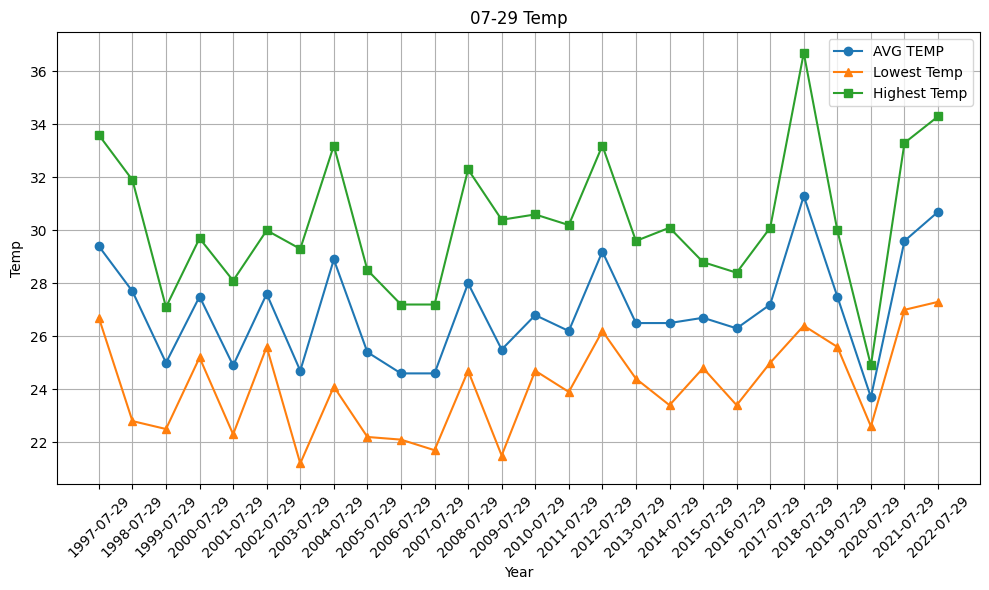

In [29]:
# 그래프 그리기 (전체 컬럼)
plt.figure(figsize=(10, 6))

plt.plot(year['날짜'], year['평균기온(℃)'], label='AVG TEMP', marker='o')
plt.plot(year['날짜'], year['최저기온(℃)'], label='Lowest Temp', marker='^')
plt.plot(year['날짜'], year['최고기온(℃)'], label='Highest Temp', marker='s')

plt.title('07-29 Temp')
plt.xlabel('Year')
plt.ylabel('Temp')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [30]:
# 날짜 컬럼 타입 확인
year['날짜'].dtype

dtype('O')

### object -> datetime64[ns] 형변환

In [31]:
# 날짜 데이터 Str => date 형으로 변환
year['날짜'] = pd.to_datetime(year['날짜'])
year['날짜'].dtype

/tmp/ipykernel_744/2379885412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['날짜'] = pd.to_datetime(year['날짜'])


dtype('<M8[ns]')

In [32]:
year.dtypes

날짜         datetime64[ns]
지점                  int64
평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
dtype: object

### 내 생일이면서 1997년 이후의 데이터만 추출
* Datetime 활용

In [33]:
# 내 생일이면서, 1997년 이후의 데이터만 추출
year_fix = year[(year['날짜'].dt.month == 7) &
             (year['날짜'].dt.day == 29) &
             (year['날짜'].dt.year >= 1997)]
year_fix

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
32378,1997-07-29,108,29.4,26.7,33.6
32743,1998-07-29,108,27.7,22.8,31.9
33108,1999-07-29,108,25.0,22.5,27.1
33474,2000-07-29,108,27.5,25.2,29.7
33839,2001-07-29,108,24.9,22.3,28.1
34204,2002-07-29,108,27.6,25.6,30.0
34569,2003-07-29,108,24.7,21.2,29.3
34935,2004-07-29,108,28.9,24.1,33.2
35300,2005-07-29,108,25.4,22.2,28.5
35665,2006-07-29,108,24.6,22.1,27.2


In [34]:
# 필요한 컬럼만 추출
avg_temp = year_fix[['날짜','평균기온(℃)']]

## 그래프 그리기

- 문제점 1.
* plt.bar()는 x축 값이 너무 많거나 또는 datetime 간격이 일정하지 않거나, bar 간 간격이 좁을 때 막대가 너무 얇게 그려지거나 보이지 않는 문제가 발생
* --> 아래 순서대로 개선

/tmp/ipykernel_744/2592975012.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


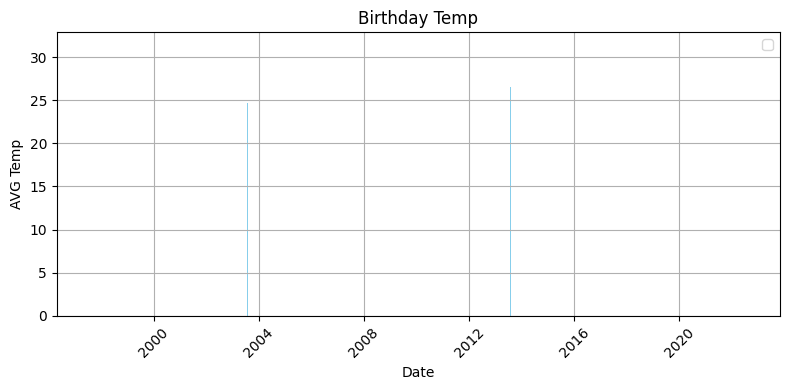

In [ ]:
import matplotlib.pyplot as plt

# 내 생일 데이터 그래프 그리기 1. (평균기온)

# 그래프 크기 지정 (날짜가 많으면 넓게 설정)
plt.figure(figsize=(8, 4))

# 그래프 타이틀
plt.title('Birthday Temp')

# 막대그래프 그리기
plt.bar(avg_temp['날짜'], avg_temp['평균기온(℃)'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('AVG Temp')

# x축 날짜 눈금이 겹치지 않게 회전
plt.xticks(rotation=45)

plt.grid(True)

# 레이아웃 자동 조정
plt.tight_layout()
plt.legend()
plt.show()

- 문제점 2.
* datetime64[ns] 타입으로 변환하면 x축이 자동으로 간격을 조정하기 때문에 모든 연도 레이블이 표시되지 않음
* --> matplotlib.dates를 사용하여 모든 연도를 x축에 강제로 표시 가능

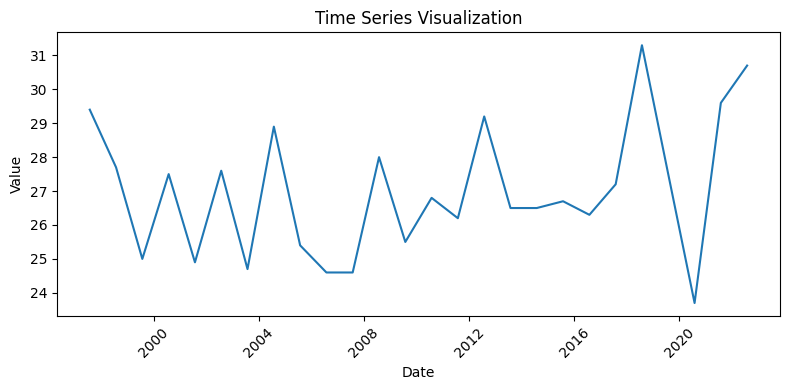

In [ ]:
# 내 생일 데이터 그래프 그리기 2. (평균기온)

plt.figure(figsize=(8, 4))
plt.plot(avg_temp['날짜'], avg_temp['평균기온(℃)'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Visualization')
plt.xticks(rotation=45)  # x축 날짜 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

### 방법 1.

* x축 값을 문자열로 바꿔서 bar 표시 보장 (문자열로 바뀐 x축 내용이 확실하게 출력됨)

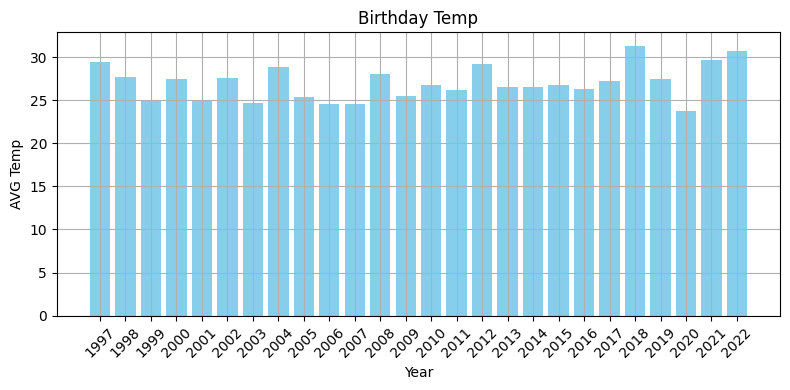

In [44]:
plt.figure(figsize=(8, 4))
plt.bar(avg_temp['날짜'].dt.strftime('%Y'), avg_temp['평균기온(℃)'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('AVG Temp')
plt.title('Birthday Temp')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 방법 2.

* bar 폭 조절(bar width) : "width=30" 같은 값으로 지정하여 bar의 폭을 설정하여 생략된 bar를 보이게 하는 효과

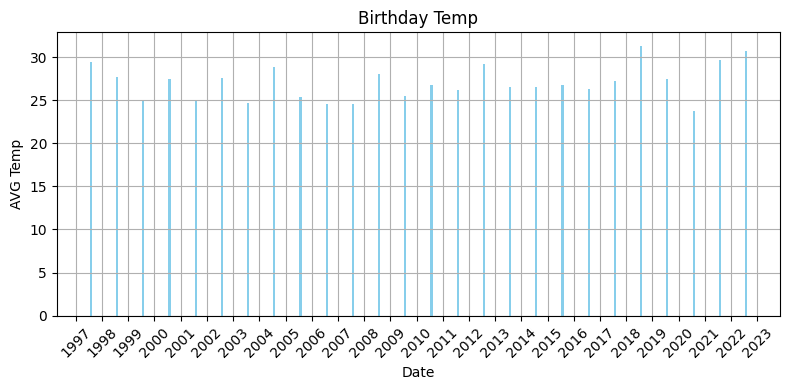

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(8, 4))
plt.bar(avg_temp['날짜'], avg_temp['평균기온(℃)'], width=30, color='skyblue')  # width는 일 단위

plt.xlabel('Date')
plt.ylabel('AVG Temp')
plt.title('Birthday Temp')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

In [ ]:
# 매년 크리스마스 날짜 추출
df_christmas = df_dropna[df_dropna['날짜'].str.contains('12-25')]
df_christmas.head(3)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
85,1907-12-25,108,3.5,1.1,6.8
451,1908-12-25,108,-0.3,-6.6,6.3
816,1909-12-25,108,-9.9,-12.5,-6.0


In [ ]:
# 필요한 내용만 추출
df_christmas = df_christmas[['날짜', '최고기온(℃)', '최저기온(℃)']]
df_christmas.head(3)

,날짜,최고기온(℃),최저기온(℃)
85,1907-12-25,6.8,1.1
451,1908-12-25,6.3,-6.6
816,1909-12-25,-6.0,-12.5


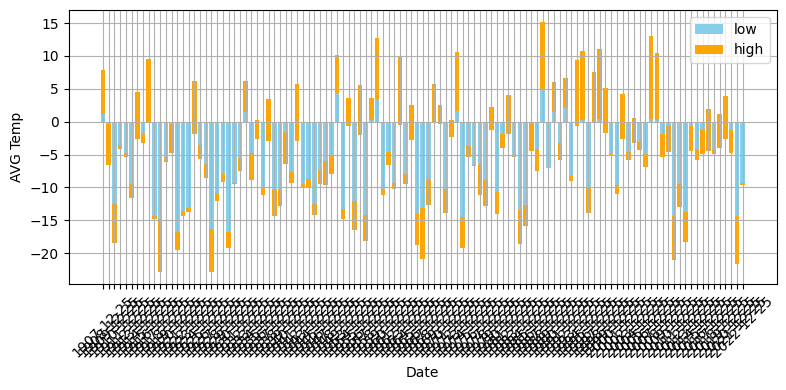

In [52]:
# 누적 바 그래프
plt.figure(figsize=(8,4))
# 최저 기온 막대
plt.bar(df_christmas['날짜'], df_christmas['최저기온(℃)'], label='low', color='skyblue')
# 최저 기온 막대 쌓기
plt.bar(df_christmas['날짜'], df_christmas['최고기온(℃)'], bottom=df_christmas['최저기온(℃)'], label='high', color='orange')

plt.xlabel('Date')
plt.ylabel('AVG Temp')

# x축 날짜 눈금이 겹치지 않게 회전
plt.xticks(rotation=45)

plt.grid(True)

# 레이아웃 자동 조정
plt.tight_layout()
plt.legend()
plt.show()

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

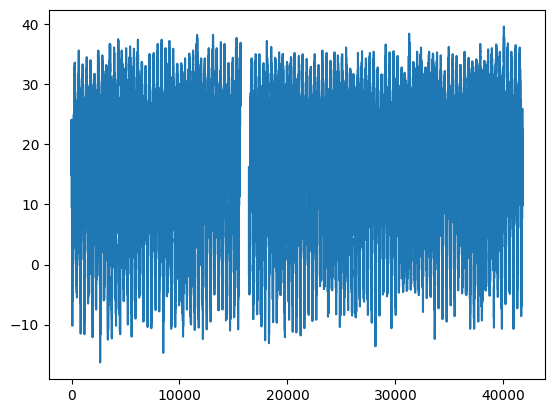

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230415151831.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

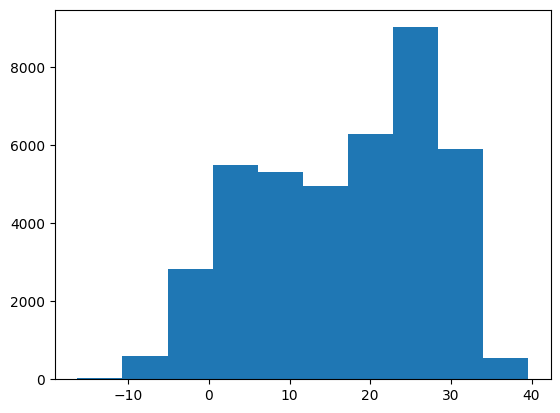

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230415151831.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.hist(df['최고기온'])
plt.show()

In [60]:
df.head(3)

,1907-10-07,108,평균기온,최저기온,최고기온
0,1907-10-08,108,8.9,3.9,14.9
1,1907-10-09,108,11.6,3.8,21.1
2,1907-10-10,108,14.2,6.4,24.1


In [ ]:
df.columns=['날짜', '지점', '평균기온', '최저기온', '최고기온']
df.head(3)

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-08,108,8.9,3.9,14.9
1,1907-10-09,108,11.6,3.8,21.1
2,1907-10-10,108,14.2,6.4,24.1


In [70]:
df_hist = df.dropna()
df_hist.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [93]:
# 8월 데이터만 추출
df_august = df_hist[df_hist['날짜'].str.contains('-08-')]
# 8월 중 최고 온도
sort_df_august = df_august.sort_values(by='최고기온', ascending=False)
print("최고 온도:", sort_df_august.head(1).values[0][-1])

최고 온도: 39.6


In [101]:
# 최고 기온 분포(최저 ~ 최고)
sort_df_august.head(3)

,날짜,지점,평균기온,최저기온,최고기온
40044,2018-08-01,108,33.6,27.8,39.6
13104,1943-08-24,108,29.0,23.2,38.2
11629,1939-08-10,108,30.1,24.5,38.2


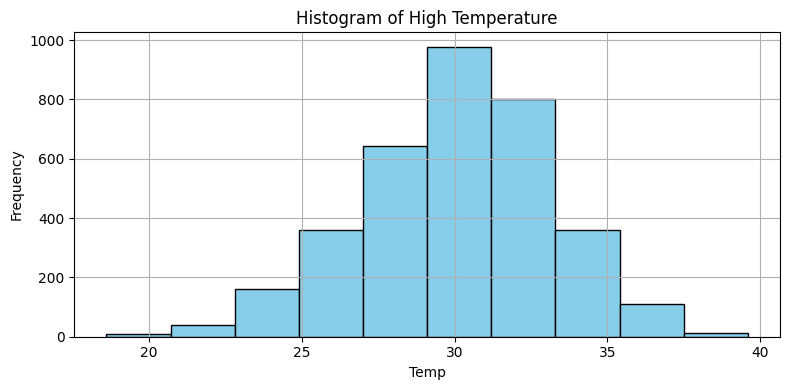

In [107]:
# hist(데이터,몇개구간,색깔)
plt.figure(figsize=(8, 4))
plt.hist(sort_df_august['최고기온'], bins=10, color='skyblue', edgecolor='black')

plt.title('Histogram of High Temperature')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


최고 온도: 39.6
최고 온도: 14.4


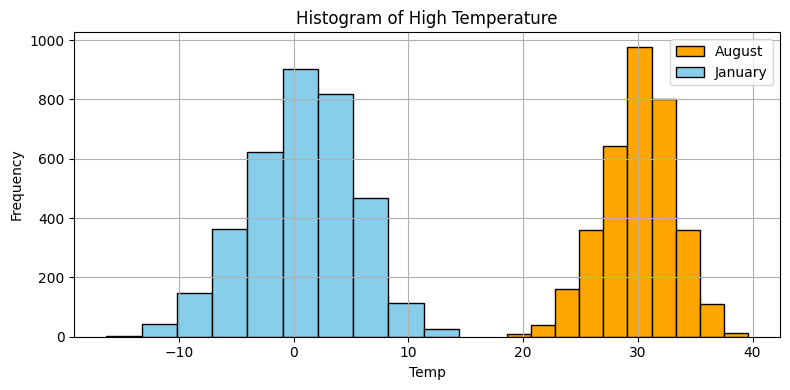

In [108]:

# 8월 데이터만 추출
df_august = df_hist[df_hist['날짜'].str.contains('-08-')]
# 8월 중 최고 온도
sort_df_august = df_august.sort_values(by='최고기온', ascending=False)
print("최고 온도:", sort_df_august.head(1).values[0][-1])


# 1월 데이터만 추출
df_jan = df_hist[df_hist['날짜'].str.contains('-01-')]
# 8월 중 최고 온도
sort_df_jan = df_jan.sort_values(by='최고기온', ascending=False)
print("최고 온도:", sort_df_jan.head(1).values[0][-1])

# 히스토그램 시각화
plt.figure(figsize=(8, 4))
plt.hist(sort_df_august['최고기온'], bins=10, label='August', color='orange', edgecolor='black')
plt.hist(sort_df_jan['최고기온'], bins=10, label='January', color='skyblue', edgecolor='black')

plt.title('Histogram of High Temperature')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있음

## box:기온 데이터 대략적인 통계정보 확인하기

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230415151831.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)

# 컬럼명 변경
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

# 확인
df.head(3)

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3


/tmp/ipykernel_744/654141219.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


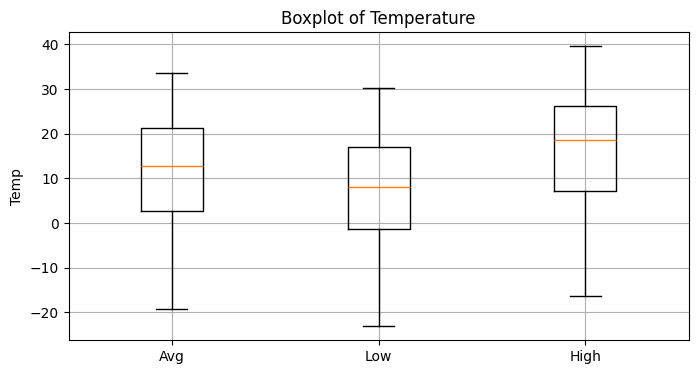

In [125]:
plt.figure(figsize=(8, 4))
# 여러 항목 비교
plt.boxplot(
    [df['평균기온'], df['최저기온'], df['최고기온']],
    labels=['Avg', 'Low', 'High'],
    patch_artist=False) # 색 채우기

plt.title('Boxplot of Temperature')
plt.ylabel('Temp')
plt.grid(True)
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20230415151831.csv')
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)

# 컬럼명 변경
df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']

# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

In [166]:
# 1월 데이터 예시
jan = df[df['날짜'].dt.month==1]

In [ ]:
# 1월부터 12월까지 월별 데이터 리스트로 추출

monthly_data = []

for m in range(1, 13):
    month_df = df[df['날짜'].dt.month == m]  # 해당 월 데이터 필터링
    monthly_data.append(month_df)           # 리스트에 추가

# monthly_data[0] ~ monthly_data[11]

/tmp/ipykernel_744/1206055211.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


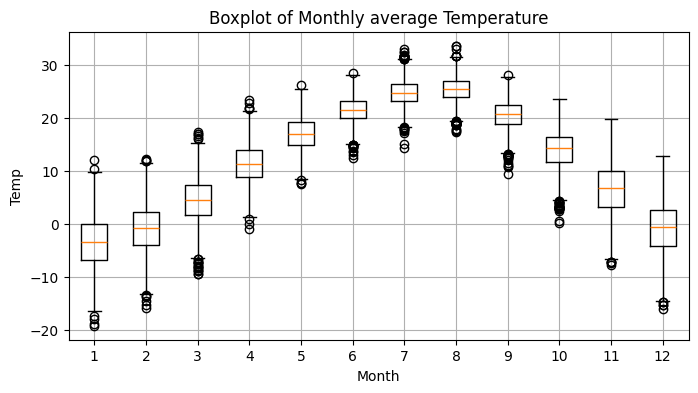

In [177]:
# 월별 평균기온 Boxplot 그리기

plt.figure(figsize=(8, 4))
# 여러 항목 비교
plt.boxplot(
    [month['평균기온'] for month in monthly_data],
    labels=range(1,13),
    patch_artist=False) # 색 채우기

plt.title('Boxplot of Monthly average Temperature')
plt.xlabel('Month')
plt.ylabel('Temp')
plt.grid(True)
plt.show()